## The Best-Worst Neighborhood
### Team Proficient Pandas


![Pandas!!](https://media.giphy.com/media/EatwJZRUIv41G/giphy.gif "Pandas!!")

#### **Introduction**
*Our group decided to explore the question "What is the most dangerous neighborhood to live in in Pittsburgh?" With data from the WPRDC, we settled on three factors that determine how dangerous a neighborhood may be to live in. The first factor we chose was COVID-19. We used a data set "COVID-19 Counts by Municipality and Neighborhood" to determine how well each neighborhood was handling the current pandemic. The next factor we thought was important was gun-violence. For this factor we used the data set "Firearm Seizures Data" in order to find out which neighborhood had the most reports of firearms being seized there. We thought that this was the best way to determine the threat of gun-violence in each neighborhood. Finally, we used "Allegheny County Median Age at Death" to determine which neighborhoods had the lowest median age at death. We thought this was a factor in being the most dangerous because people dying at younger ages means that there is likely other factors causing the median age at death to decrease. Overall, we concluded that the most dangerous neighborhood in Pittsburgh would be the one that has a combination of the most covid cases, the most firearms being seized, and the lowest median age at death.*

#### **Metrics**
*We decided to score each dataset individually and then use a loop to find overlap in the top 35 most dangerous neighborhoods of each dataset and finally rank those neighborhoods based on where they scored on the datasets.*
 - Position 1: 1 POINT
 - Position 2: 2 POINTS
 - Position 3: 3 POINTS
 
*And so on. The lowest scoring neighborhood of the ones that overlap would be deemed the most dangerous neighborhood in Pittsburgh.*

In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

## **Caleb's Personal Notebook**

In [2]:
covid_data = pd.read_csv("https://data.wprdc.org/datastore/dump/0f214885-ff3e-44e1-9963-e9e9062a04d1", 
                          usecols = ['neighborhood_municipality', 'indv_tested', 'cases'])

# Addition of a "cases_per_100_indv" column to find the average amount of cases per 100 individuals in each neighborhood
covid_data['cases_per_100_indv'] = covid_data['cases'] / covid_data['indv_tested'] * 100

# Creates a new dataframe called high_to_low_risk that sorts the covid_data 
# from descending order beginning with the most cases/100 individuals tested
high_to_low_risk = covid_data.sort_values("cases_per_100_indv", ascending = False)

# Creates a new dataframe called highest_risk that contains the first 35 data points from high_to_low_risk
highest_risk = high_to_low_risk.head(35)
highest_risk.head(35)

,neighborhood_municipality,indv_tested,cases,cases_per_100_indv
82,Glen Hazel (Pittsburgh),320,96,30.000000
91,Haysville,13,3,23.076923
38,Central Oakland (Pittsburgh),1389,257,18.502520
8,Baldwin Borough,4289,693,16.157612
173,South Oakland (Pittsburgh),612,98,16.013072
90,Hays (Pittsburgh),47,7,14.893617
216,Whitehall,2868,421,14.679219
131,New Homestead (Pittsburgh),162,23,14.197531
126,Mount Oliver Borough,514,72,14.007782
198,Undefined,1508,205,13.594164


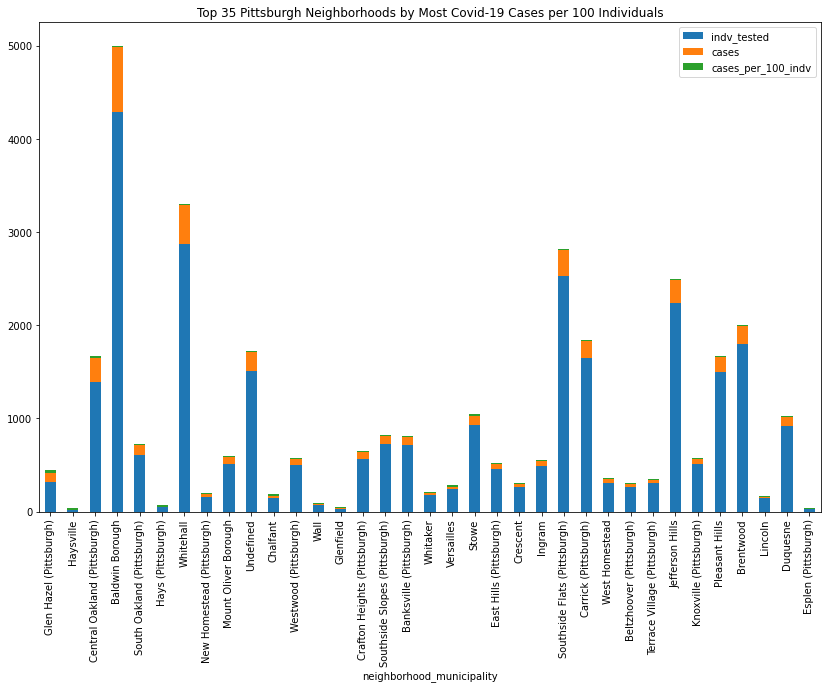

In [4]:
# Bar Chart of the highest_risk dataframe that contains only the 
# top 35 Pittsburgh neighborhoods with the highest metric 
highest_risk.plot.bar(x = "neighborhood_municipality", title = "Top 35 Pittsburgh Neighborhoods by Most Covid-19 Cases per 100 Individuals", 
                    figsize=(14,9), stacked = True)

## **Kyra's Personal Notebook**

In [4]:
death = pd.read_csv("https://data.wprdc.org/dataset/ee735209-4de7-4ea4-b446-bf0f0f6d9cb3/resource/c2e1500a-a12a-4e91-be94-76c6a892b7e2/download/nhoodmedianage20112015.csv")
quantity_bool = []
death_total = death["TOTALdeaths*"]
for length in death_total:
    if length > 24:
        quantity_bool.append(True)
    else:
        quantity_bool.append(False)
is_over_tf = pd.Series(quantity_bool)
big_death = death[is_over_tf]
big_death = big_death.sort_values("TOTAL MD AGE AT DEATH", ascending = True)
big_death_top35 = big_death[0:35]
big_death_top35.head()

,NEIGHBORHOOD,BLACKdeaths,Black MD AGE AT DEATH,WHITEdeaths,White MD AGE AT DEATH,TOTALdeaths*,TOTAL MD AGE AT DEATH
49,EAST ALLEGHENY,51.0,62.7,100.0,70.0,157.0,66.2
42,ALLENTOWN,41.0,55.6,82.0,72.1,126.0,66.5
38,MANCHESTER,97.0,67.2,15.0,70.0,113.0,67.4
22,NORTHVIEW HEIGHTS,51.0,69.5,1.0,NaN,54.0,68.0
14,CALIFORNIA-KIRKBRIDE,16.0,70.0,10.0,70.0,30.0,69.3


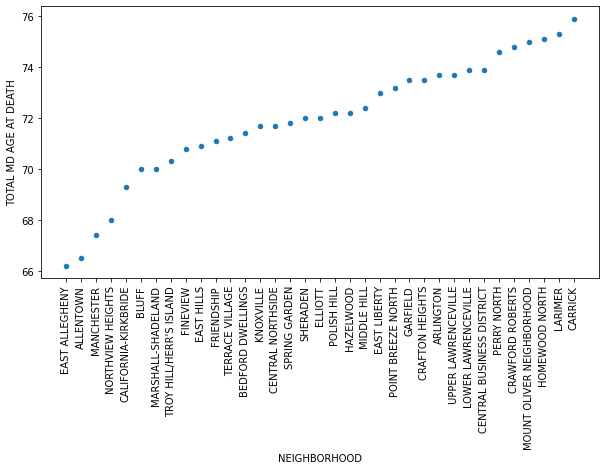

In [5]:
big_death_top35.plot.scatter(x="NEIGHBORHOOD", y="TOTAL MD AGE AT DEATH", figsize=(10,5))
plt.xticks(rotation=90)
plt.show()

## **Emily's Personal Notebook**

In [5]:
firearms_data = pd.read_csv("firearms_data.csv", index_col="_id", usecols = ['_id', 'total_count', 'neighborhood'])
firearms_data.pivot(columns="neighborhood", values="total_count")

def filter_greater_than(x, threshold):
    if len(x)>threshold:
        return True
    else:
        return False

# use the custom function to filter out rows
most_dangerous = firearms_data.groupby("neighborhood").filter(filter_greater_than, 
                                                     threshold=29)
# look at what centers are in the data now
most_dangerous.groupby('neighborhood').count()

most_firearms = most_dangerous.groupby('neighborhood').count()
most_firearms = most_firearms.sort_values("total_count", ascending = False)
most_firearms.head(35)

,total_count
neighborhood,
Homewood South,168
South Side Flats,119
Homewood North,90
Larimer,88
Carrick,86
Hazelwood,85
Perry South,83
Central Business District,80
Sheraden,80


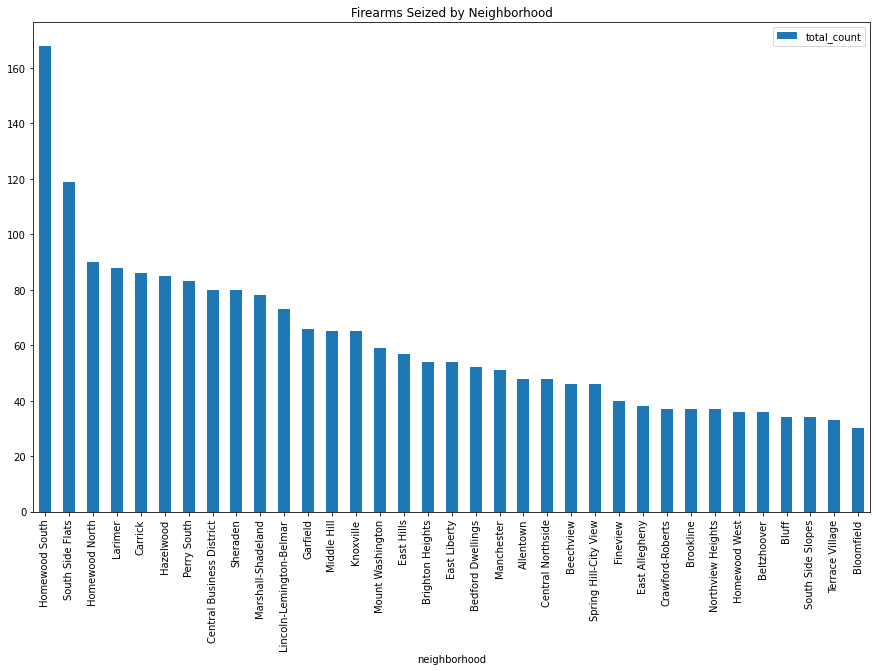

In [6]:
most_firearms.plot.bar(title = "Firearms Seized by Neighborhood", figsize=(15,9), stacked = True)

## **Combining the Data**

In [8]:
result_covid = pd.read_csv("result_covid.csv", usecols = ["neighborhood_municipality", "cases_per_100_indv"])
result_covid.to_csv("covid.csv")
result_firearms = pd.read_csv("result_firearms.csv", usecols = ["neighborhood", "total_count"])
result_firearms.to_csv("firearms.csv")
result_deaths = pd.read_csv("result_deaths.csv", usecols = ["NEIGHBORHOOD", "TOTAL MD AGE AT DEATH"])
result_deaths.to_csv("deaths.csv")

In [9]:
neighborhood_covid_dict = {}
covid_graph = {}
neighborhood_fire_dict = {}
firearms_graph = {}
neighborhood_deaths_dict = {}
deaths_graph = {}

In [10]:
with open("covid.csv",'r') as data: 
    next(data)
    for line in csv.reader(data): 
        val = int(line[0]) + 1
        if line[1].lower() not in neighborhood_covid_dict:
            neighborhood_covid_dict[line[1].lower()] = val
        else:
            neighborhood_covid_dict[line[1].lower()] = val + neighborhood_covid_dict[line[1].lower()]
        covid_graph[line[1].lower()] = 1

neighborhood_covid = pd.Series(neighborhood_covid_dict).to_frame()        

with open("firearms.csv",'r') as data: 
    next(data)
    for line in csv.reader(data): 
        val = int(line[0]) + 1
        if line[1].lower() not in neighborhood_fire_dict:
            neighborhood_fire_dict[line[1].lower()] = val
        else:
            neighborhood_fire_dict[line[1].lower()] = val + neighborhood_fire_dict[line[1].lower()]
        firearms_graph[line[1].lower()] = 1

neighborhood_firearms = pd.Series(neighborhood_fire_dict).to_frame()

with open("deaths.csv",'r') as data: 
    next(data)
    for line in csv.reader(data): 
        val = int(line[0]) + 1
        if line[1].lower() not in neighborhood_deaths_dict:
            neighborhood_deaths_dict[line[1].lower()] = val
        else:
            neighborhood_deaths_dict[line[1].lower()] = val + neighborhood_deaths_dict[line[1].lower()]
        deaths_graph[line[1].lower()] = 1

neighborhood_deaths = pd.Series(neighborhood_deaths_dict).to_frame()

In [11]:
overlap = neighborhood_fire_dict.keys() & neighborhood_deaths_dict.keys() & neighborhood_covid_dict.keys()

In [12]:
all_dict = {}
with open("deaths.csv",'r') as data: 
    next(data)
    for line in csv.reader(data): 
        val = int(line[0]) + 1
        if line[1].lower() not in all_dict:
            all_dict[line[1].lower()] = val
        else:
            all_dict[line[1].lower()] = val + all_dict[line[1].lower()]
            
with open("firearms.csv",'r') as data: 
    next(data)
    for line in csv.reader(data): 
        val = int(line[0]) + 1
        if line[1].lower() not in all_dict:
            all_dict[line[1].lower()] = val
        else:
            all_dict[line[1].lower()] = val + all_dict[line[1].lower()]

with open("covid.csv",'r') as data: 
    next(data)
    for line in csv.reader(data): 
        val = int(line[0]) + 1
        if line[1].lower() not in all_dict:
            all_dict[line[1].lower()] = val
        else:
            all_dict[line[1].lower()] = val + all_dict[line[1].lower()]
            
print (sorted(all_dict.items(), key=lambda x: x[1], reverse = False))

[('homewood south', 1), ('glen hazel', 1), ('south side flats', 2), ('central oakland', 2), ('baldwin borough', 3), ('whitehall', 4), ('california-kirkbride', 5), ('south oakland', 5), ('haysville', 6), ('perry south', 7), ('new homestead', 7), ("troy hill/herr's island", 8), ('mount oliver borough', 8), ('chalfant', 9), ('hays', 10), ('friendship', 11), ('lincoln-lemington-belmar', 11), ('glenfield', 11), ('westwood', 13), ('banksville', 14), ('mount washington', 15), ('southside slopes', 15), ('spring garden', 16), ('versailles', 16), ('marshall-shadeland', 17), ('brighton heights', 17), ('whitaker', 17), ('elliott', 18), ('esplen', 18), ('polish hill', 19), ('ingram', 19), ('stowe', 20), ('southside flats', 21), ('undefined', 22), ('allentown', 23), ('point breeze north', 23), ('beechview', 23), ('west homestead', 23), ('spring hill-city view', 24), ('east hills', 26), ('sheraden', 26), ('hazelwood', 26), ('arlington', 26), ('east allegheny', 27), ('upper lawrenceville', 27), ('craw

In [13]:
for neighborhood in overlap:
    print(neighborhood + ": " + str(all_dict[neighborhood]))

bedford dwellings: 60
homewood north: 69
knoxville: 53
carrick: 71
terrace village: 72
manchester: 47


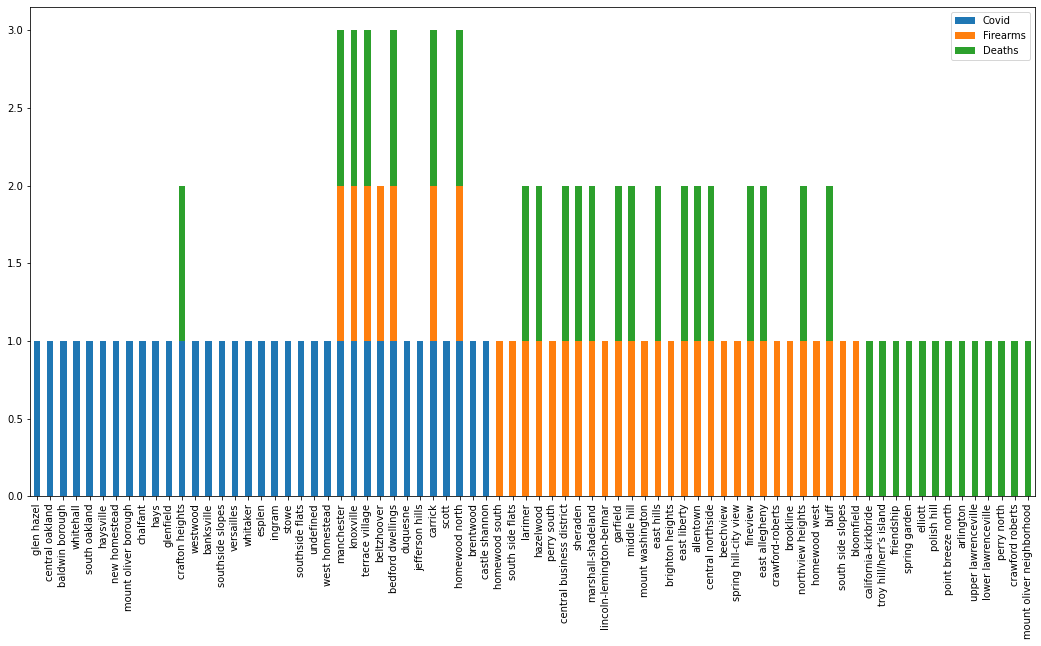

In [14]:
graph_dict = {}
graph_dict["Covid"] = covid_graph
graph_dict["Firearms"] = firearms_graph
graph_dict["Deaths"] = deaths_graph

graph_dataframe = pd.DataFrame(graph_dict)
graph_dataframe.plot.bar(figsize = [18, 9], stacked=True)
plt.show()

## Conclusion

The winner of "The Most Dangerous Neighborhood in Pittsburgh" is: **Manchester**

*Manchester had the lowest score out of the six neighborhoods that overlapped in the top 35 of all three datasets, making it the most dangerous neighborhood*

## Kyra's Conclusion
I personally do not know the neighborhoods of Pittsburgh very well because I come from out of state and with covid haven't had much of a chance to explore, so I didn't know what to expect for the most dangerous neighborhood. Based on my personal notebook, I think that Manchester winning makes sense because it had the third lowest median age at death. I think the most interesting part of this project is looking at the data visualization because it shows the overlap between the three datasets and it makes connections more clear. It seems that the covid dataset and the age at death datasets do not have a lot of overlap, meaning there is less of a correlation there, however the firearms dataset and the age at death dataset seem to overlap quite a bit. This brings me to the conclusion that a neighborhood that has more firearm seizures is more likely to have a shorter lifespan on average for residents.The disconnect between covid and shorter lifespans may be due to when the data for these datasets were taken, but it is also possible that it is because covid disporportionately affects older people and thus may not change the median age at death in a neighborhood. I also think it is worth mentioning that I found in my personal notebook when I graphed the median age at death for white people compared to the total median age at death and the median age at death for black people compared to the total median age at death for each neighborhood, I found that the scales were drastically different. For white people, the age at death ranged from about 60-90, while the age at death for black people ranged from about 0-85. I think this is indicative of larger societal issues and is worth noting.

## Emily's Conclusion
*The best aka most dangerous neighborhood based on our data was Manchester. Unfortunately, I have not lived in or near Pittsburgh long enough to dispute this, so I cannot say if it is different than what I personally believe is most dangerous, however I did do some research online to see what is generally considered the most dangerous neighborhood, and Manchester never came up on the sites I viewed. It's strange to me because Manchester, which ranked the lowest place out of the six neighborhoods that overlapped (lowest was most dangerous) was rarely mentioned for dangerous neighborhoods while Knoxville, Homewood North, and Carrick (which were ranked 2nd, 4th, and 5th respectively) frequently came up on the lists of most dangerous neighborhoods, which leads me to believe that our data is not entirely incorrect, and that the code we used probably does function the way we want it to. I think the difference between what makes a truly dangerous neighborhood and the data that we analyzed is that we don't have every part of the story, and the data, though recent, isn't exactly completely up to date (I know at least my data was from 2015)*

## Caleb's Conclusion

*Our "best" worst neighborhood was Manchester, an area I did not know even existed since I am not that familiar with the city of Pittsburgh. With that said, I do not fully know whether this conclusion is correct. Most online sites do not list Manchester as being an extremely dangerous or unsafe neighborhood, but based on our data, there was overlap between all 3 datasets. Analyzing the stacked bar chart of the combined datasets, one notices that there is much more overlap between the firearms and deaths data compared to the Covid data. This observation can be explained by the fact that much of the Covid data obtained is not "heterogeneous" in that the population size for some neighborhoods are much smaller than that of others, which may be affected by the very fact that these are the most dangerous cities. With updated testing and observation in not only Covid but all the metrics, we may provide a more accurate conclusion as to which current Pittsburgh neighborhood is the "best" at being the worst.*